In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
#create validation set and scale the input features
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
#creating class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Creating the model using the Sequential API

In [6]:
# Here is a classification MLP with two hidden layers
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.layers

In [9]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [10]:
weights, biases = hidden1.get_weights()
weights

array([[-0.00767487,  0.00345001, -0.06372666, ...,  0.04509521,
         0.05744077,  0.0132044 ],
       [-0.05839965, -0.00423399, -0.06498999, ..., -0.00192771,
        -0.03709615, -0.02115759],
       [ 0.02484225,  0.05281532, -0.02955281, ..., -0.0516764 ,
         0.07094461, -0.06592289],
       ...,
       [-0.05079318,  0.06740607,  0.02602974, ...,  0.00051676,
        -0.009225  ,  0.00863459],
       [-0.05763084, -0.01448773,  0.06307262, ..., -0.05711051,
         0.07315007, -0.07188804],
       [-0.03285526, -0.0049192 ,  0.05863138, ...,  0.04934233,
        -0.02698978,  0.01276278]], dtype=float32)

In [11]:
weights.shape

(784, 300)

In [12]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [13]:
biases.shape

(300,)

In [14]:
# Compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### Training and evaluating the model 

In [15]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.7178 - accuracy: 0.7644 - val_loss: 0.5006 - val_accuracy: 0.8370
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4878 - accuracy: 0.8299 - val_loss: 0.4751 - val_accuracy: 0.8330
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4407 - accuracy: 0.8444 - val_loss: 0.4120 - val_accuracy: 0.8628
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4120 - accuracy: 0.8556 - val_loss: 0.4019 - val_accuracy: 0.8604
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3932 - accuracy: 0.8616 - val_loss: 0.3784 - val_accuracy: 0.8698
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3762 - accuracy: 0.8668 - val_loss: 0.3797 - val_accuracy: 0.8674
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3633 - accuracy: 0.8720 - val_loss: 0.3642 - val_accuracy:

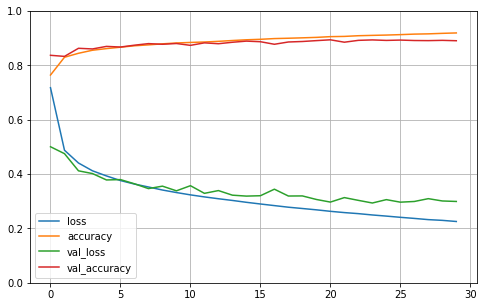

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [17]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 73.8271 - accuracy: 0.8360


[73.82707214355469, 0.8360000252723694]

### Using the model to make predictions

In [18]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [19]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [20]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [21]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)